# Data 
Updated 2015-12-21: Winton have added new data into the test set. If you downloaded the test set before 2015-12-21 please re-download the data set and submit predictions on this instead. 

In this competition the challenge is to predict the return of a stock, given the history of the past few days. 

We provide 5-day windows of time, days D-2, D-1, D, D+1, and D+2. You are given returns in days D-2, D-1, and part of day D, and you are asked to predict the returns in the rest of day D, and in days D+1 and D+2.

During day D, there is intraday return data, which are the returns at different points in the day. We provide 180 minutes of data, from t=1 to t=180. In the training set you are given the full 180 minutes, in the test set just the first 120 minutes are provided.

For each 5-day window, we also provide 25 features, Feature_1 to Feature_25. These may or may not be useful in your prediction.

### Note
***Each row in the dataset is an arbitrary stock at an arbitrary 5 day time window***.



# File descriptions
***train.csv*** - the training set, including the columns of:
* Feature_1 - Feature_25
* Ret_MinusTwo, Ret_MinusOne
* Ret_2 - Ret_120
* Ret_121 - Ret_180: ***target variables***
* Ret_PlusOne, Ret_PlusTwo: ***target variables***
* Weight_Intraday, Weight_Daily

***test.csv*** - the test set, including the columns of:

* Feature_1 - Feature_25
* Ret_MinusTwo, Ret_MinusOne
* Ret_2 - Ret_120

***sample_submission.csv*** - a sample submission file in the correct format


Data fields
Feature_1 to Feature_25: different features relevant to prediction
Ret_MinusTwo:  this is the return from the close of trading on day D-2 to the close of trading on day D-1 (i.e. 1 day)
Ret_MinusOne: this is the return from the close of trading on day D-1 to the point at which the intraday returns start on day D (approximately 1/2 day)
Ret_2 to Ret_120: these are returns over approximately one minute on day D. Ret_2 is the return between t=1 and t=2. 
Ret_121 to Ret_180: intraday returns over approximately one minute on day D. These are the target variables you need to predict as {id}_{1-60}. 
Ret_PlusOne: this is the return from the time Ret_180 is measured on day D to the close of trading on day D+1. (approximately 1
day). This is a target variable you need to predict as {id}_61. 
Ret_PlusTwo: this is the return from the close of trading on day D+1 to the close of trading on day D+2 (i.e. 1 day) This is a target variable you need to predict as {id}_62. 

**Weight_Intraday**: weight used to evaluate intraday return predictions Ret 121 to 180

**Weight_Daily**: weight used to evaluate daily return predictions (Ret_PlusOne and Ret_PlusTwo).

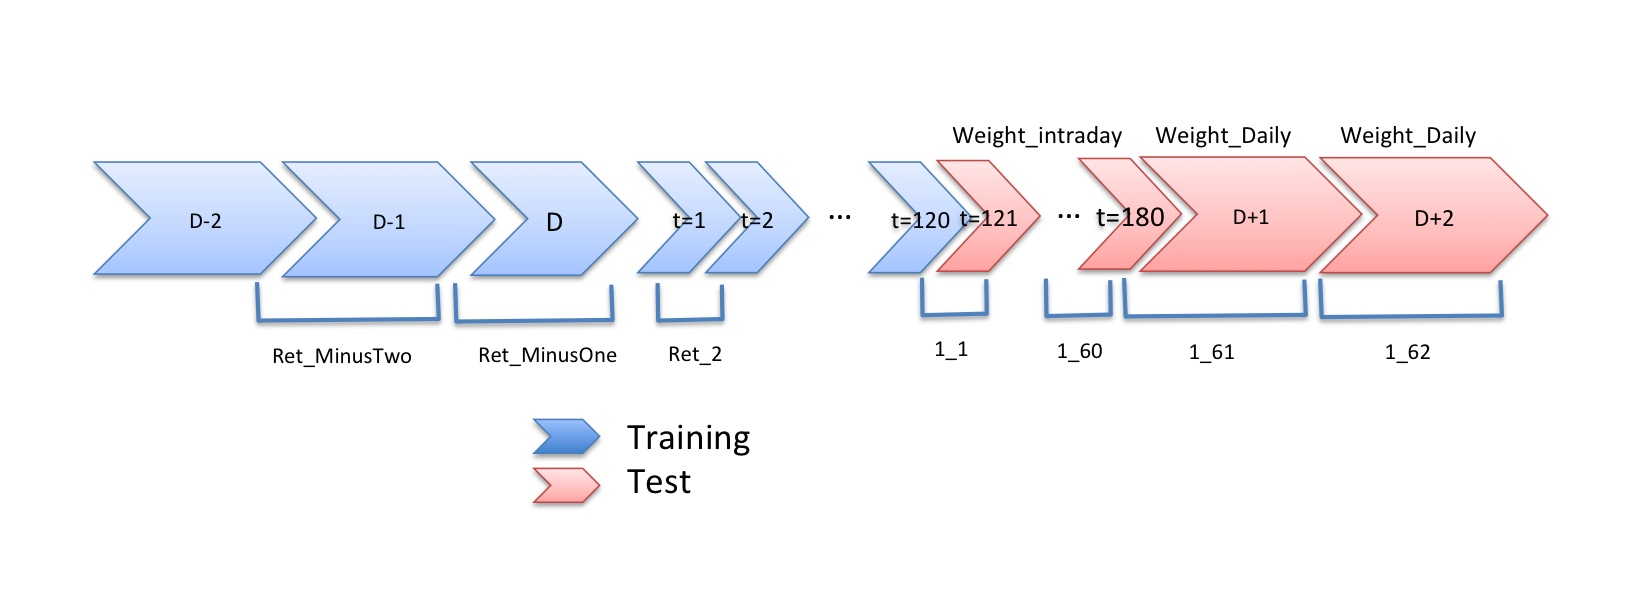

In [1]:
from IPython.display import Image
Image(filename="Presentation1.jpg")

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
PROJECT_ROOT_DIR = os.path.join(os.path.dirname('__file__'), '.')
PROJECT_DATA_DIR = os.path.join(PROJECT_ROOT_DIR, 'kaggle')

In [4]:
train = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'train_winton.csv')).drop('Id', axis=1)
test = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 'test_2_winton.csv')).drop('Id', axis=1)

In [5]:
train.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.0,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.0,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.0,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [6]:
test.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,1.0,1.412783,-0.056284,NaN,10.0,0.413226,18871,0.2138,11.0,NaN,...,0.000370,-0.000762,NaN,0.000366,-0.002444,-0.001301,-0.000917,0.000762,-0.000556,0.000759
1,NaN,NaN,0.907973,1.002425,7.0,-0.257825,5852,0.2138,13.0,4.0,...,0.000457,0.000003,-0.000007,-0.000003,-0.000012,-0.000463,-0.000003,-0.000002,0.000468,-0.000012
2,NaN,-0.607583,1.076668,0.517865,5.0,0.947340,76935,0.0105,10.0,NaN,...,0.000003,0.000157,-0.000181,0.000003,NaN,0.000164,0.000353,0.000704,-0.000168,-0.000006
3,NaN,2.230240,0.223222,NaN,1.0,NaN,84573,0.3318,13.0,NaN,...,0.000010,-0.000792,-0.000479,0.000017,0.000170,-0.001079,0.000320,0.000006,0.001392,-0.001850
4,NaN,0.360399,0.597896,-0.145497,10.0,0.275744,89615,0.0099,8.0,5.0,...,0.000447,0.000489,-0.000233,-0.000495,0.000057,-0.000050,-0.000011,-0.000377,0.000227,-0.000114


In [7]:
no_col = len(train.columns)
print('train.columns:')
print(train.columns)

print('test.columns:')
print(test.columns)
print(train.info())

print('.' * 50)
print('train:')
print(train.head())
print('.' * 50)
print('test:')
print(test.head())


train.columns:
Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'Ret_175', 'Ret_176', 'Ret_177', 'Ret_178', 'Ret_179', 'Ret_180',
       'Ret_PlusOne', 'Ret_PlusTwo', 'Weight_Intraday', 'Weight_Daily'],
      dtype='object', length=210)
test.columns:
Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'Ret_111', 'Ret_112', 'Ret_113', 'Ret_114', 'Ret_115', 'Ret_116',
       'Ret_117', 'Ret_118', 'Ret_119', 'Ret_120'],
      dtype='object', length=146)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 210 entries, Feature_1 to Weight_Daily
dtypes: float64(209), int64(1)
memory usage: 64.1 MB
None
..................................................
train:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0        

In [8]:
#for col in train.columns:
#(100 * train.isnull().sum()/len(train)).round(2) 

In [9]:
train.T.head(no_col)

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
Feature_1,NaN,NaN,NaN,NaN,6.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feature_2,NaN,NaN,-6.967269e-01,-6.943497e-01,-1.736489e+00,NaN,-2.306355e-01,2.582955e+00,-1.879500e-01,2.883570e+00,...,NaN,-7.112782e-01,-7.871670e-01,NaN,1.335217e+00,NaN,7.475562e-01,NaN,-2.145700e-02,1.093868e+00
Feature_3,NaN,NaN,7.395907e-01,1.568248e+00,2.765531e+00,-6.805151e-01,-2.270214e-01,1.573438e-01,-2.598202e-01,8.137834e-01,...,6.019254e-01,6.276700e-01,1.189032e+00,-1.279783e-01,-3.876239e-01,8.223709e-01,-4.894179e-01,-9.147013e-01,1.021284e+00,-6.773911e-01
Feature_4,NaN,NaN,-1.679282e-01,4.790731e-01,1.245280e+00,NaN,-8.412617e-02,6.172607e-01,4.763739e-02,7.967455e-01,...,8.624412e-01,1.022876e+00,1.680224e-01,-1.227303e+00,-4.027978e-01,NaN,-2.671932e-01,-1.013004e+00,NaN,-6.044791e-01
Feature_5,8.000000e+00,3.000000e+00,9.000000e+00,5.000000e+00,7.000000e+00,1.000000e+00,7.000000e+00,8.000000e+00,8.000000e+00,7.000000e+00,...,1.000000e+00,2.000000e+00,1.000000e+01,9.000000e+00,8.000000e+00,1.000000e+00,1.000000e+01,2.000000e+00,3.000000e+00,7.000000e+00
Feature_6,NaN,3.888963e-01,4.719467e-01,1.206529e-01,4.866985e+00,2.270336e-01,-9.500748e-02,-1.773333e-01,-3.816212e-01,2.198172e-02,...,2.297448e+00,3.878946e-01,1.874297e-01,-3.362979e-01,NaN,2.182050e+00,-4.543285e-01,-7.010130e-01,1.092849e+00,NaN
Feature_7,7.575100e+04,1.736900e+04,8.277000e+03,2.250800e+04,2.242300e+04,2.409900e+04,3.935100e+04,9.221400e+04,1.841800e+04,4.763700e+04,...,6.248800e+04,2.885900e+04,8.263900e+04,3.540900e+04,6.460300e+04,2.372900e+04,5.622200e+04,7.024000e+03,2.737600e+04,4.141000e+03
Feature_8,2.254000e-01,1.660000e-02,3.650000e-01,2.654000e-01,2.138000e-01,2.064000e-01,3.650000e-01,2.119000e-01,3.583000e-01,2.654000e-01,...,1.010000e-02,2.064000e-01,1.420000e-02,3.318000e-01,3.451000e-01,2.208000e-01,2.323000e-01,3.418000e-01,2.119000e-01,2.254000e-01
Feature_9,1.100000e+01,1.300000e+01,9.000000e+00,1.300000e+01,1.300000e+01,8.000000e+00,1.300000e+01,8.000000e+00,8.000000e+00,6.000000e+00,...,1.600000e+01,1.300000e+01,8.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01,8.000000e+00,1.000000e+01,1.300000e+01,NaN
Feature_10,NaN,NaN,5.000000e+00,5.000000e+00,4.000000e+00,NaN,NaN,5.000000e+00,5.000000e+00,5.000000e+00,...,NaN,NaN,5.000000e+00,5.000000e+00,5.000000e+00,NaN,5.000000e+00,5.000000e+00,NaN,NaN


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 210 entries, Feature_1 to Weight_Daily
dtypes: float64(209), int64(1)
memory usage: 64.1 MB


In [11]:
train.shape

(40000, 210)

In [12]:
train.shape, test.shape

((40000, 210), (120000, 146))

In [13]:
def get_percentage_missing(series):
    return round(series.isnull().sum()/len(series), 2)

In [14]:
def delete_na(df, thresh=0.4):
    for col in df.columns.tolist():
        if get_percentage_missing(df[col]) > thresh:
            print(get_percentage_missing(df[col]))
            print('Deleting Column {}'.format(col))
            df.drop(col, axis=1, inplace=True)
    return df

In [15]:
xtrain = train.iloc[:, :146] # pick the first 147 columns as input x
#print(xtrain.shape)
#print(xtrain.head())
ytrain = train.iloc[:, 146:] # pick from column 147 to the end for output y
#print(ytrain.head())
xtrain.shape, ytrain.shape

((40000, 146), (40000, 64))

In [16]:
#xtrain = xtrain[xtrain.columns[xtrain.isnull().any()].tolist()]

In [17]:
xtrain.drop(['Feature_1', 'Feature_10'], axis=1, inplace=True)
test.drop(['Feature_1', 'Feature_10'], axis=1, inplace=True)

In [18]:
xtrain.shape, test.shape

((40000, 144), (120000, 144))

# First version, do not use features 1-25

In [26]:
# the column index might need to be changed because we deleted column id
#xtrain = xtrain.iloc[:, 25:] # note xtrain.iloc[...]

In [27]:
print(xtrain.shape)

xtrain.head()

(40000, 144)


,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_11,Feature_12,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,0.49,...,NaN,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04
1,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,-0.409923,0.71,...,-0.000010,0.000249,0.000492,-0.000022,0.000046,-0.000294,-0.000366,-0.000125,-0.000007,2.558108e-04
2,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,-0.473024,0.03,...,0.000250,-0.000138,-0.000266,0.000786,0.001702,-0.000271,-0.000530,-0.000666,-0.000270,-3.718829e-04
3,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,-2.138383,0.00,...,-0.000571,0.000288,0.000006,0.000148,-0.000260,0.000387,-0.000435,-0.000689,0.000153,2.220483e-04
4,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,-4.795565,0.97,...,-0.000014,0.001210,0.000011,-0.000005,-0.000011,0.000003,-0.001229,-0.000003,0.001208,-4.473375e-07


In [28]:
test.head()

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_11,Feature_12,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,1.412783,-0.056284,NaN,10.0,0.413226,18871,0.2138,11.0,-0.229910,0.97,...,0.000370,-0.000762,NaN,0.000366,-0.002444,-0.001301,-0.000917,0.000762,-0.000556,0.000759
1,NaN,0.907973,1.002425,7.0,-0.257825,5852,0.2138,13.0,-0.971909,0.93,...,0.000457,0.000003,-0.000007,-0.000003,-0.000012,-0.000463,-0.000003,-0.000002,0.000468,-0.000012
2,-0.607583,1.076668,0.517865,5.0,0.947340,76935,0.0105,10.0,-1.096276,0.88,...,0.000003,0.000157,-0.000181,0.000003,NaN,0.000164,0.000353,0.000704,-0.000168,-0.000006
3,2.230240,0.223222,NaN,1.0,NaN,84573,0.3318,13.0,-0.509942,0.76,...,0.000010,-0.000792,-0.000479,0.000017,0.000170,-0.001079,0.000320,0.000006,0.001392,-0.001850
4,0.360399,0.597896,-0.145497,10.0,0.275744,89615,0.0099,8.0,-1.188949,0.64,...,0.000447,0.000489,-0.000233,-0.000495,0.000057,-0.000050,-0.000011,-0.000377,0.000227,-0.000114


In [29]:
cols = 0
for col in xtrain.columns:
    if col.startswith('Feature'):
        cols += 1
print(cols)

23


In [30]:
xtrain = xtrain.iloc[:, cols:]
#xtest = test.iloc[:, cols:]
#print(xtrain.shape, xtest.shape)
xtrain.head()

,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,...,NaN,0.000700,-0.000843,0.000268,-0.000415,-0.001133,0.000004,-0.000137,-0.000009,1.340780e-04
1,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,...,-0.000010,0.000249,0.000492,-0.000022,0.000046,-0.000294,-0.000366,-0.000125,-0.000007,2.558108e-04
2,0.003077,0.006181,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,...,0.000250,-0.000138,-0.000266,0.000786,0.001702,-0.000271,-0.000530,-0.000666,-0.000270,-3.718829e-04
3,0.000984,0.014106,0.000277,-0.000088,-0.000199,-0.000301,0.000711,-0.000431,-0.000144,0.000340,...,-0.000571,0.000288,0.000006,0.000148,-0.000260,0.000387,-0.000435,-0.000689,0.000153,2.220483e-04
4,-0.018224,0.011065,-0.001232,0.000002,-0.001205,-0.000021,0.000005,0.000623,-0.001843,0.000005,...,-0.000014,0.001210,0.000011,-0.000005,-0.000011,0.000003,-0.001229,-0.000003,0.001208,-4.473375e-07


In [31]:
ytrain.head()

,Ret_121,Ret_122,Ret_123,Ret_124,Ret_125,Ret_126,Ret_127,Ret_128,Ret_129,Ret_130,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,-0.000137,-0.000565,-0.000704,-0.005605,0.000826,0.001966,0.002676,0.000422,-0.000428,-0.000539,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,0.000261,0.000238,-0.000113,-0.000248,-0.000351,-0.000003,-0.000002,0.000267,0.000263,-0.000240,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,0.000271,0.000126,0.000655,-0.000515,-0.000924,-0.000769,0.000282,-0.000120,0.000408,-0.000267,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,0.000210,-0.000301,-0.000142,0.000068,-0.000508,-0.000122,0.000295,0.000297,-0.000199,-0.000217,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,0.000011,0.000013,0.000622,0.000612,-0.001207,0.001233,-0.001234,-0.000003,0.001226,0.000009,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [32]:
#numnames = xtrain.select_dtypes(exclude=object).columns.tolist()

In [33]:
#numnames[:5]

      Ret_2     Ret_3     Ret_4     Ret_5     Ret_6     Ret_7     Ret_8  \
0  0.000003 -0.000734 -0.000738 -0.000007  0.000423  0.000438 -0.000076   

      Ret_9    Ret_10    Ret_11    ...     Ret_111  Ret_112   Ret_113  \
0  0.000645 -0.000006  0.000006    ...         NaN   0.0007 -0.000843   

    Ret_114   Ret_115   Ret_116   Ret_117   Ret_118   Ret_119   Ret_120  
0  0.000268 -0.000415 -0.001133  0.000004 -0.000137 -0.000009  0.000134  

[1 rows x 119 columns]


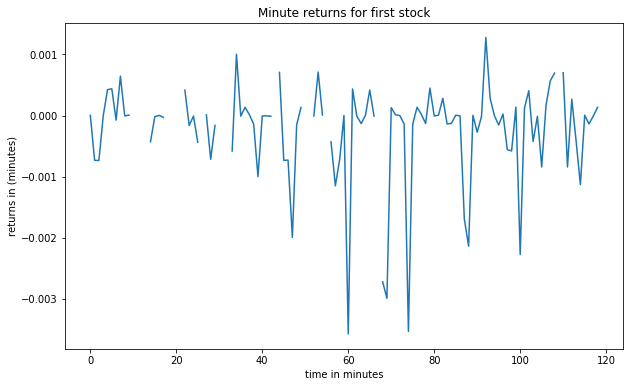

In [34]:
print(xtrain.iloc[:1, 2:].head())
plt.figure(figsize=(10, 6))
plt.title('Minute returns for first stock')
plt.plot(xtrain.iloc[:1, 2:].values.flatten())
plt.xlabel('time in minutes')
plt.ylabel('returns in (minutes)');

### plot minute returns for first 10 rows = 10 stocks

In [35]:
def plot_stocks(xtrain, row=1, colstart=2, endcol=None):
    plt.figure(figsize=(10, 6))
    plt.title('Minute stock returns')
    plt.plot(xtrain.iloc[:row, colstart:endcol].values.flatten())
    plt.xlabel('time in minutes')
    plt.ylabel('returns in (minutes)');

In [36]:
#def run_plot(xtrain, start=1, end=10):
#    for i in range(start, end):
#        plot_stocks(xtrain, row=i)

      Ret_2     Ret_3     Ret_4     Ret_5     Ret_6     Ret_7     Ret_8  \
0  0.000003 -0.000734 -0.000738 -0.000007  0.000423  0.000438 -0.000076   

      Ret_9    Ret_10    Ret_11    ...     Ret_111  Ret_112   Ret_113  \
0  0.000645 -0.000006  0.000006    ...         NaN   0.0007 -0.000843   

    Ret_114   Ret_115   Ret_116   Ret_117   Ret_118   Ret_119   Ret_120  
0  0.000268 -0.000415 -0.001133  0.000004 -0.000137 -0.000009  0.000134  

[1 rows x 119 columns]


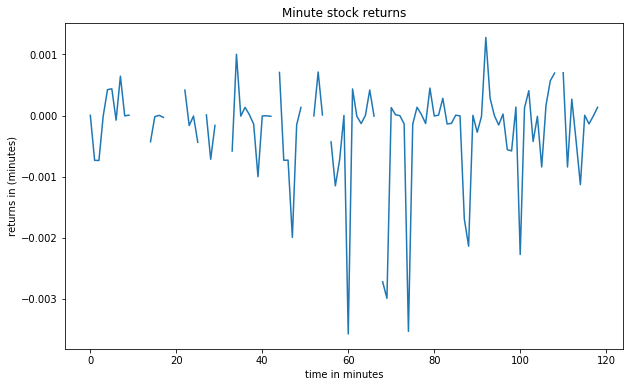

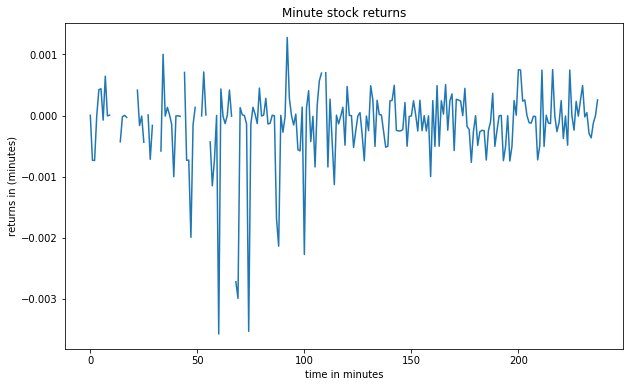

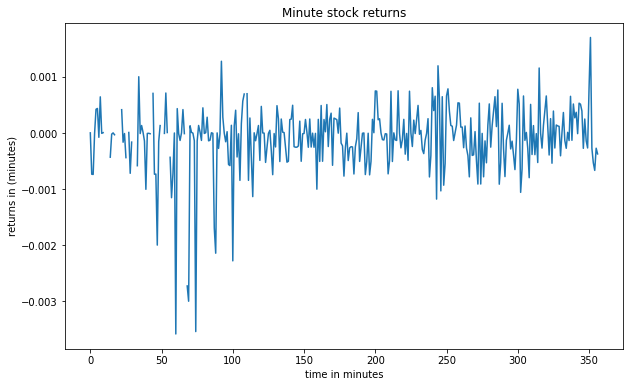

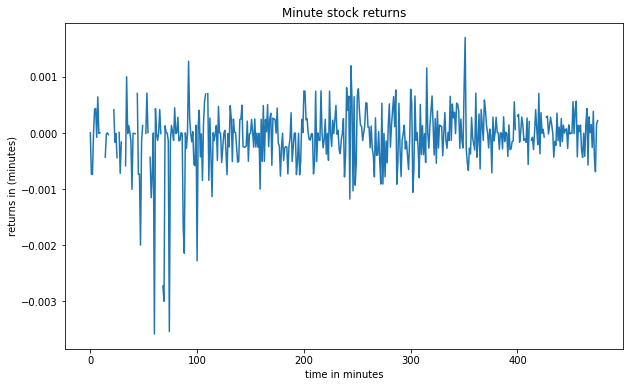

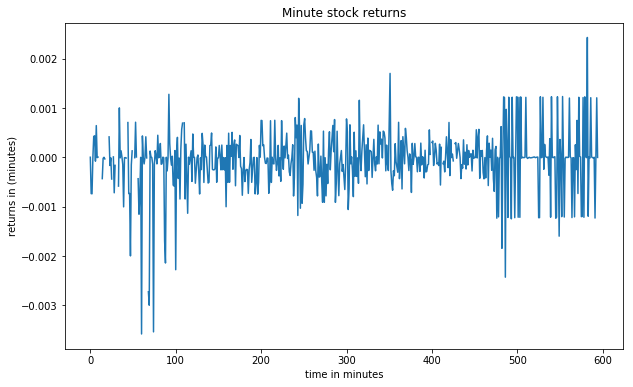

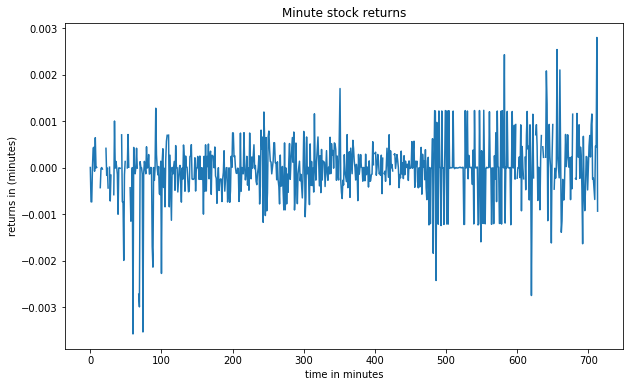

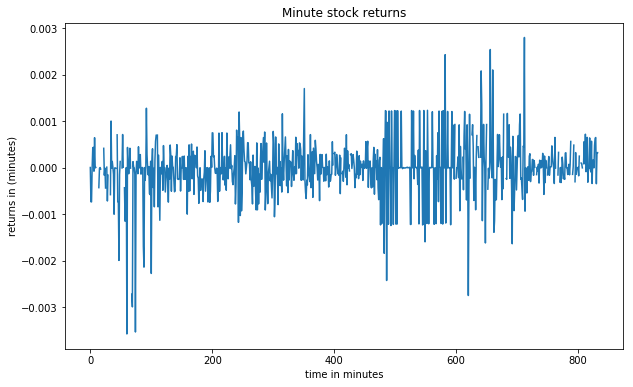

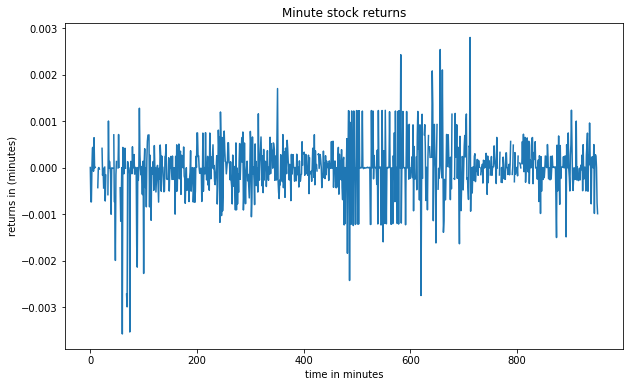

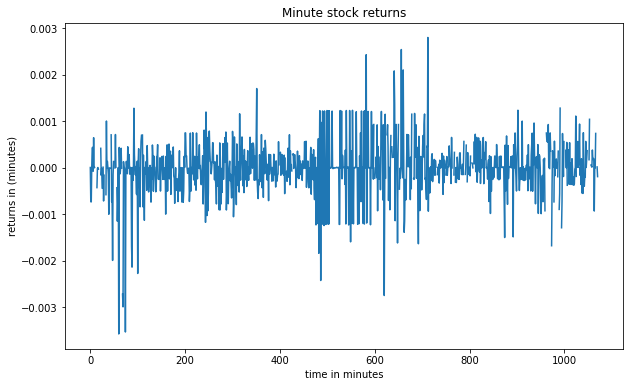

In [37]:
print(xtrain.iloc[:1, 2:].head())
for i in range(1, 10):
    plot_stocks(xtrain, row=i)

      Ret_2     Ret_3     Ret_4     Ret_5     Ret_6     Ret_7     Ret_8  \
0  0.000003 -0.000734 -0.000738 -0.000007  0.000423  0.000438 -0.000076   

      Ret_9    Ret_10    Ret_11    ...     Ret_111  Ret_112   Ret_113  \
0  0.000645 -0.000006  0.000006    ...         NaN   0.0007 -0.000843   

    Ret_114   Ret_115   Ret_116   Ret_117   Ret_118   Ret_119   Ret_120  
0  0.000268 -0.000415 -0.001133  0.000004 -0.000137 -0.000009  0.000134  

[1 rows x 119 columns]


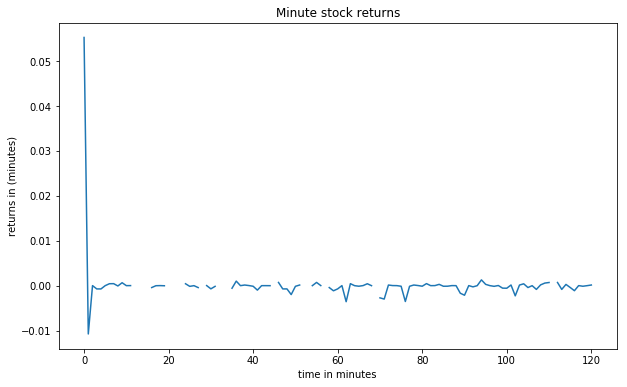

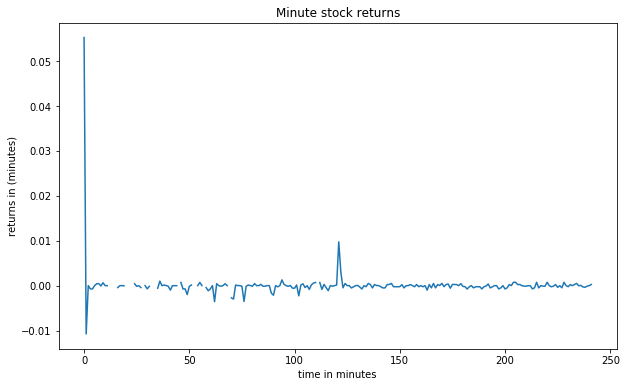

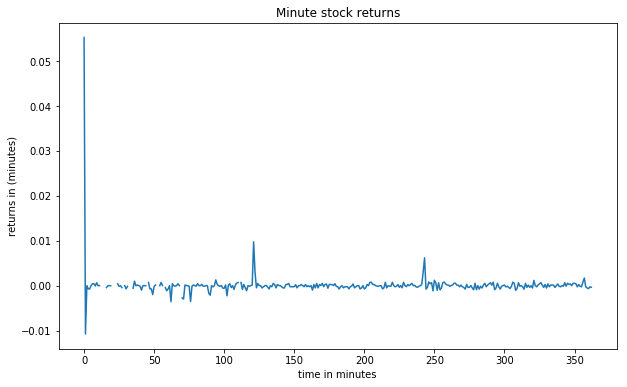

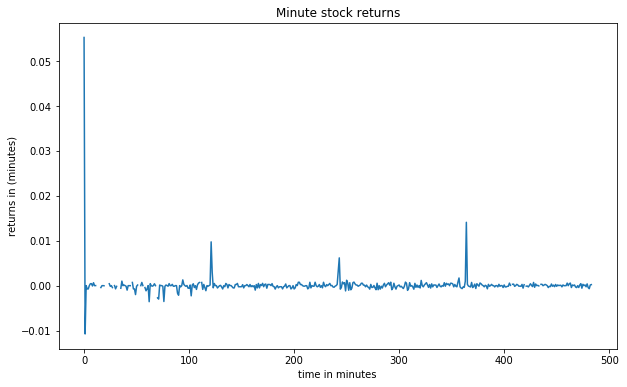

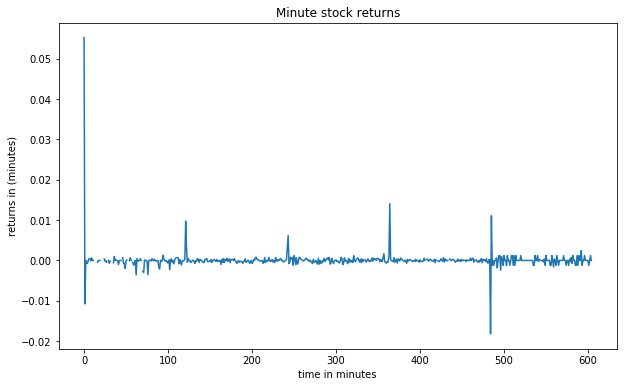

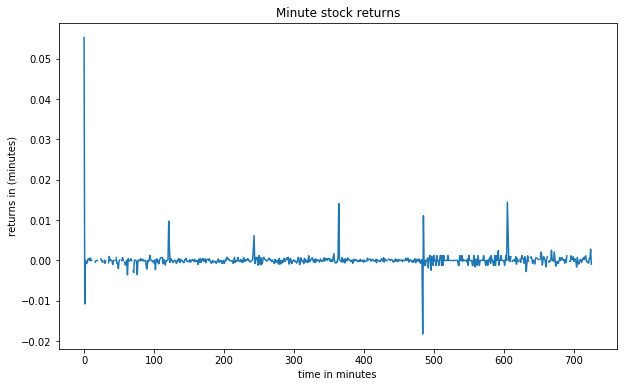

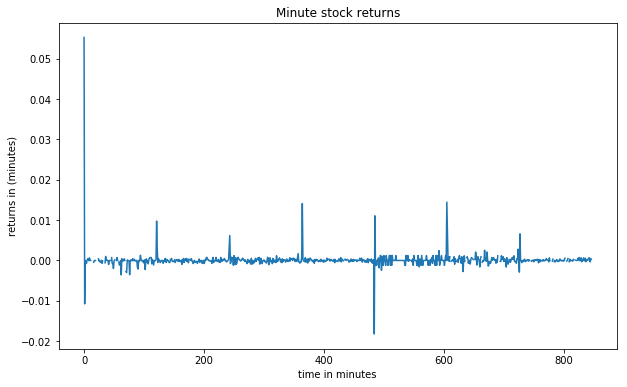

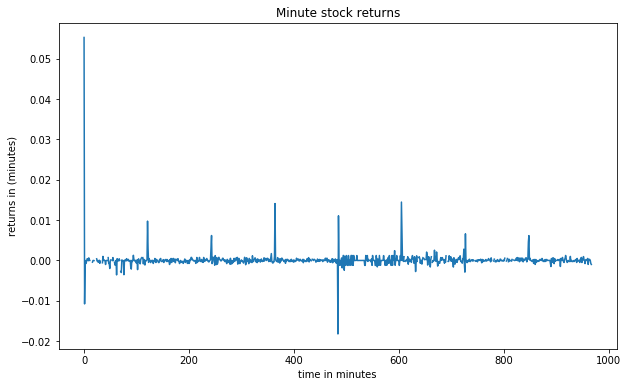

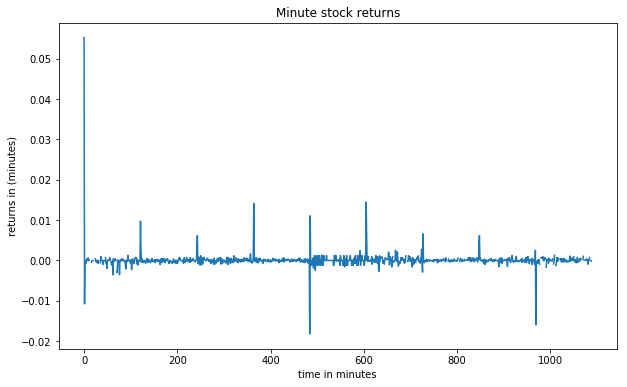

In [38]:
print(xtrain.iloc[:1, 2:].head())
for i in range(1, 10):
    plot_stocks(xtrain, row=i, colstart=None)

## outputs

..................................................
(40000, 64)
    Ret_121   Ret_122   Ret_123   Ret_124   Ret_125   Ret_126   Ret_127  \
0 -0.000137 -0.000565 -0.000704 -0.005605  0.000826  0.001966  0.002676   

    Ret_128   Ret_129   Ret_130    ...      Ret_171   Ret_172   Ret_173  \
0  0.000422 -0.000428 -0.000539    ...     0.001539 -0.000142  0.000861   

    Ret_174   Ret_175   Ret_176   Ret_177   Ret_178   Ret_179   Ret_180  
0  0.000544 -0.002688  0.002246 -0.000838 -0.000695  0.000003 -0.001974  

[1 rows x 60 columns]


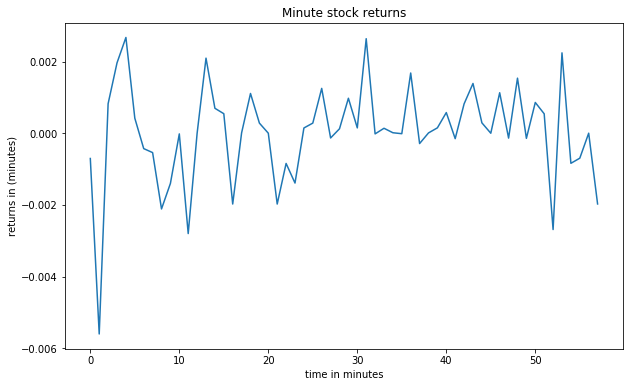

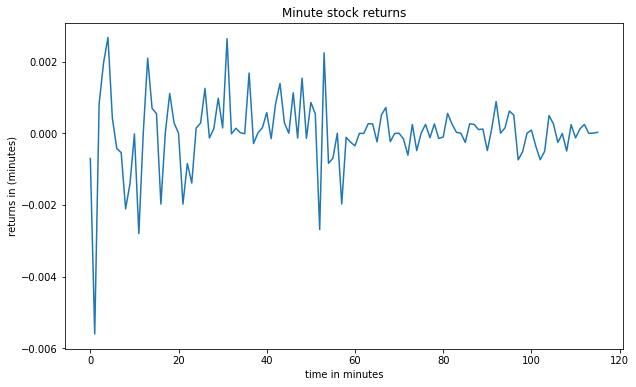

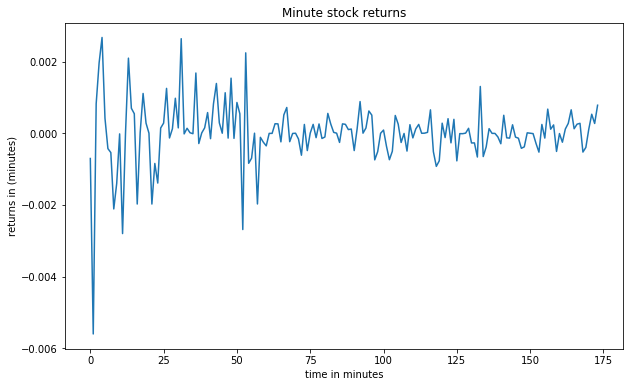

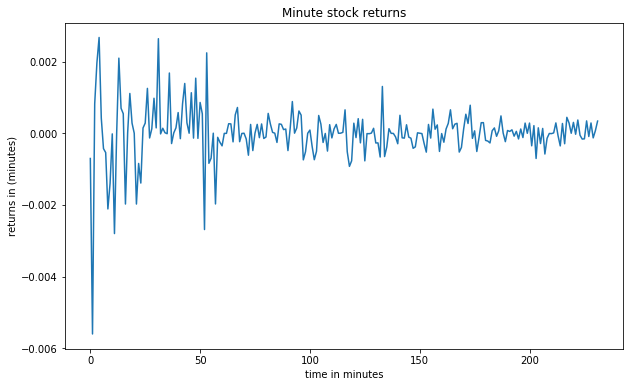

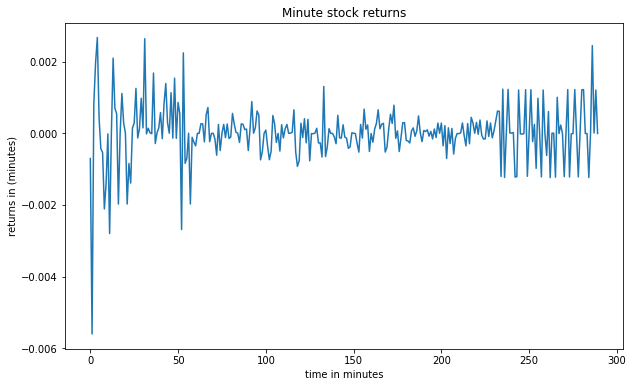

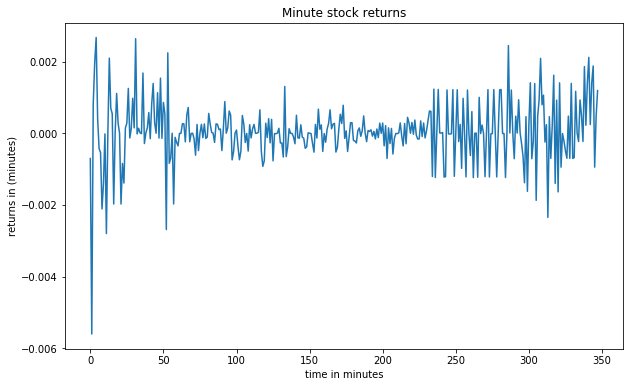

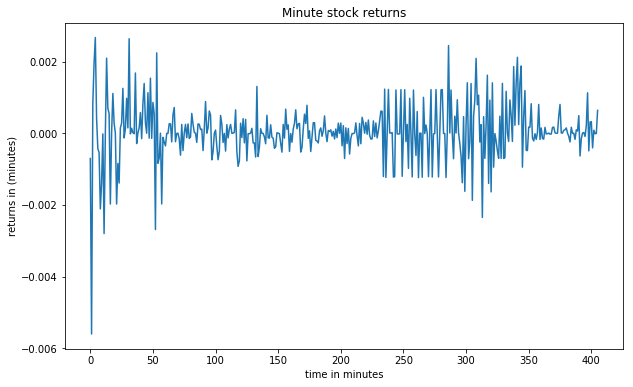

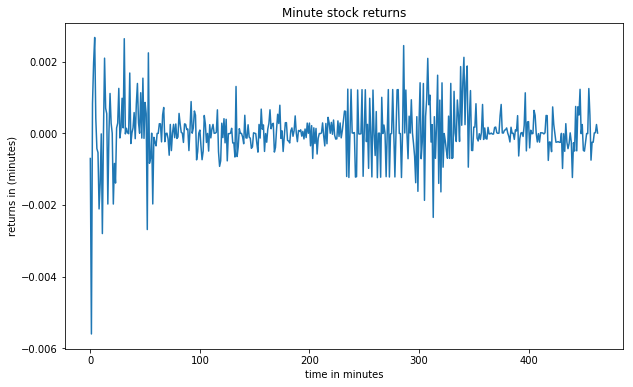

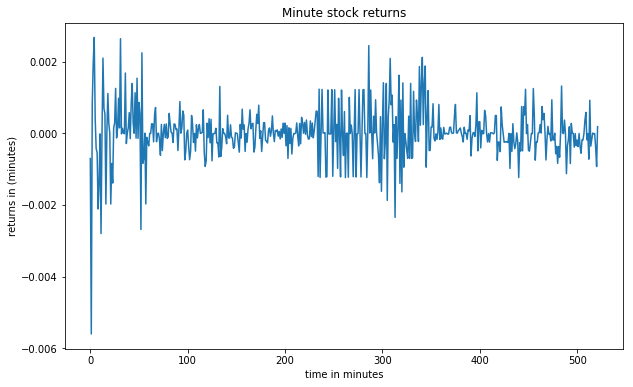

In [39]:
#print(ytrain.head())
print('.' * 50)
print(ytrain.shape)
print(ytrain.iloc[:1, :60].head())
for i in range(1, 10):
    plot_stocks(ytrain, row=i, endcol=60)

..................................................
(40000, 64)
    Ret_121   Ret_122   Ret_123   Ret_124   Ret_125   Ret_126   Ret_127  \
0 -0.000137 -0.000565 -0.000704 -0.005605  0.000826  0.001966  0.002676   

    Ret_128   Ret_129   Ret_130     ...        Ret_173   Ret_174   Ret_175  \
0  0.000422 -0.000428 -0.000539     ...       0.000861  0.000544 -0.002688   

    Ret_176   Ret_177   Ret_178   Ret_179   Ret_180  Ret_PlusOne  Ret_PlusTwo  
0  0.002246 -0.000838 -0.000695  0.000003 -0.001974    -0.019512     0.028846  

[1 rows x 62 columns]


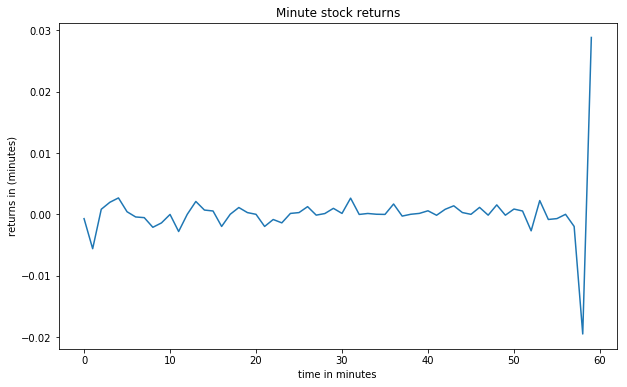

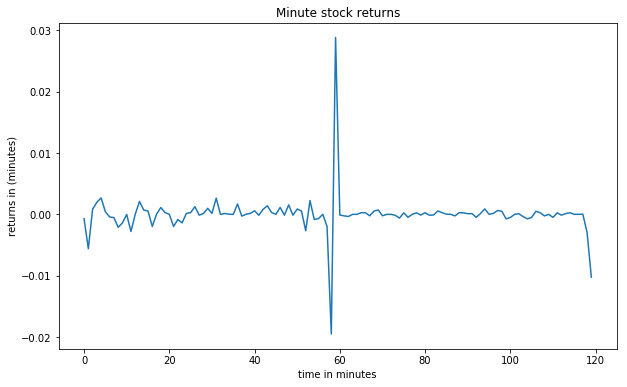

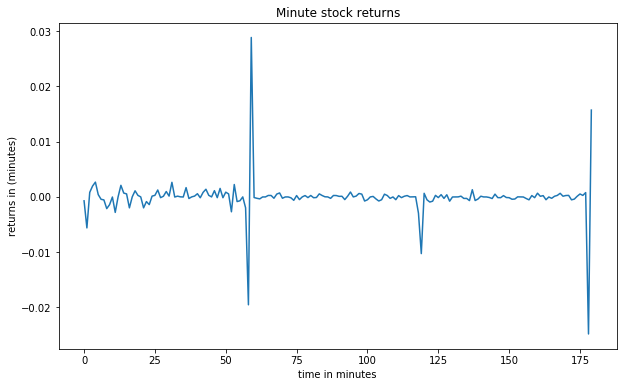

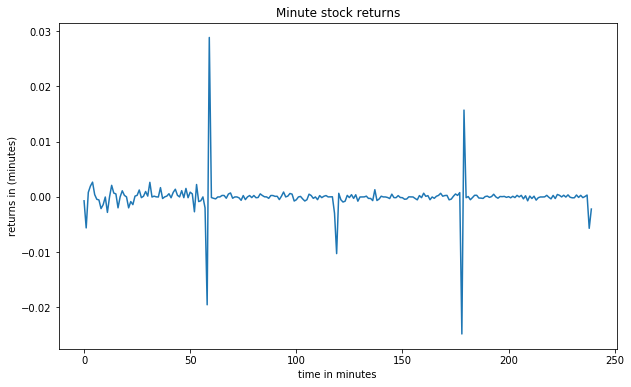

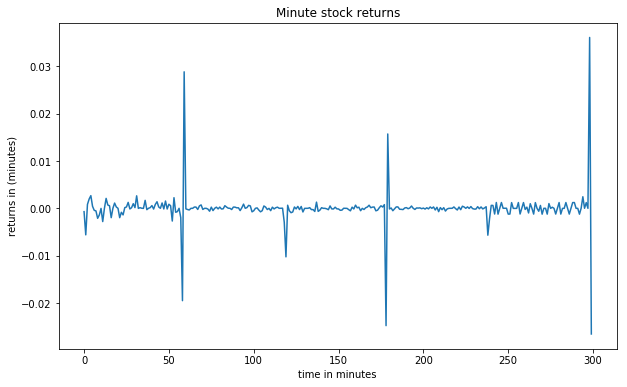

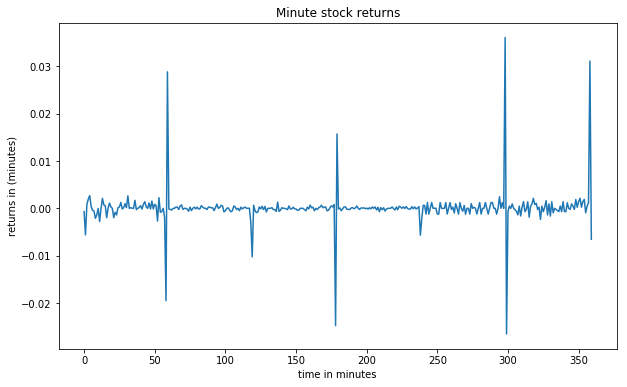

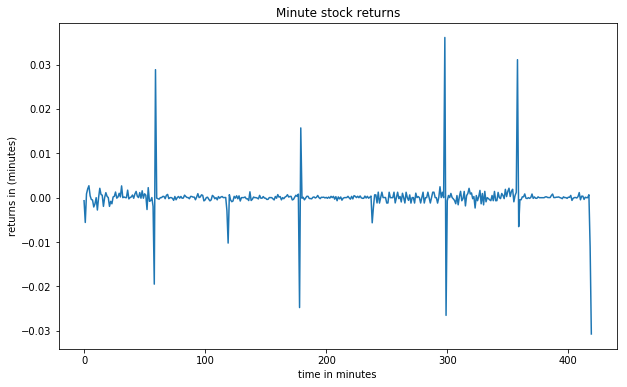

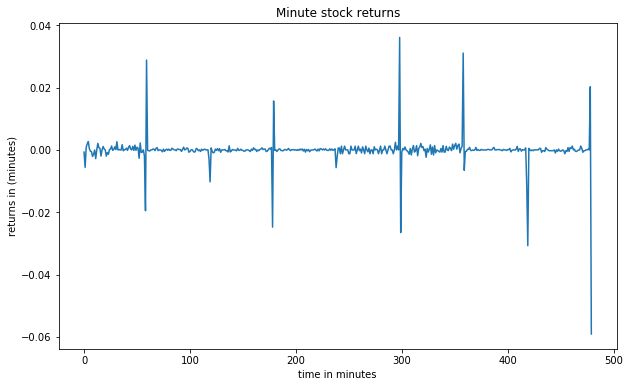

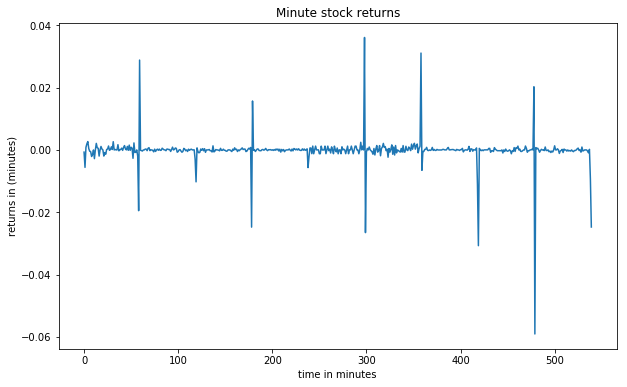

In [40]:
#print(ytrain.head())
print('.' * 50)
print(ytrain.shape)
print(ytrain.iloc[:1, :62].head())
for i in range(1, 10):
    plot_stocks(ytrain, row=i, endcol=62)

In [41]:
#print(ytrain.columns)
y1 = ytrain['Ret_PlusOne'] # D + 1 returns
y2 = ytrain['Ret_PlusTwo'] # D + 2 returns

print(y1.shape, y2.shape)
print()
print(y1.head(2))
print()
print(y2.head(2))

(40000,) (40000,)

0   -0.019512
1   -0.002939
Name: Ret_PlusOne, dtype: float64

0    0.028846
1   -0.010253
Name: Ret_PlusTwo, dtype: float64


# preprocess both input and output

## Transforming target in regression
TransformedTargetRegressor transforms the targets y before fitting a regression model. The predictions are mapped back to the original space via an inverse transform. It takes as an argument the regressor that will be used for prediction, and the transformer that will be applied to the target variable:

# Machine learning

In [42]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor # used for transforming the target variable
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from dask.distributed import Client
#import joblib

np.random.seed(100)

# Predict: D + 1 Returns

In [43]:
xtrain, xtest, ytrain1, ytest1 = train_test_split(xtrain, y1, shuffle=True)

In [44]:
xtrain.shape, xtest.shape, ytrain1.shape, ytest1.shape

((30000, 121), (10000, 121), (30000,), (10000,))

In [45]:
imp = SimpleImputer(strategy='median')
xtrain = imp.fit_transform(xtrain)
xtest = imp.transform(xtest)

scaler = QuantileTransformer(output_distribution='normal')
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Scores
* R2 (0, 1), where 1 is good fit
* Explainde variance score (0, 1) where 1 is good fit

In [46]:
transformer = QuantileTransformer(output_distribution='normal')
# we might need to do grid or random search
regressor = RandomForestRegressor()#Ridge(alpha=0.1)
reg = TransformedTargetRegressor(regressor=regressor, 
                                 transformer=transformer)

param_dist = {"max_depth": sp_randint(5, 10),
              "max_features": sp_randint(2, 8),
              "min_samples_split": sp_randint(5, 10),
              "bootstrap": [True, False],
              "criterion": ["mae", "mse"], 
              "n_estimators": sp_randint(60, 70)}

#reg.fit(xtrain, ytrain1)
n_iter_search = 10
reg = RandomizedSearchCV(regressor, 
                         param_distributions=param_dist, 
                         n_iter=n_iter_search, 
                         cv=3, 
                         iid=False, 
                         verbose=10, 
                         n_jobs=-1)

# use the train examples only
# for hyper parameter optimization
train_samples = 5000
test_samples = 6000
xtr = xtrain[:train_samples, :]
ytr = ytrain1[:train_samples]

xts = xtrain[train_samples:test_samples, :]
yts = ytrain1[train_samples:test_samples]

reg.fit(xtr, ytr)
print('Done with training.')
pred_train = reg.predict(xtr)
pred_test = reg.predict(xts)

sctest = r2_score(yts, pred_test)
sctrain = r2_score(ytr, pred_train)

mse_train = mean_squared_error(ytr, pred_train)
mse_test = mean_squared_error(yts, pred_test)

ex_variance_train = explained_variance_score(ytr, pred_train)
ex_variance_test = explained_variance_score(yts, pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('R2 score train score: {0: .2f} score test set: {0: .2f}'.format(sctrain, sctest))
print('Mean-squared error train set: {0: .4f} test set: {0: .4f}'.format(mse_train, mse_test))
print('Explained variance train set: {0: .4f} test set: {0: .4f}'.format(ex_variance_train, ex_variance_test))
print('Root means squared error train set {0: .4f} test set: {0: .4f}'.format(rmse_train, rmse_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   40.6s remaining:   23.5s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   42.8s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.1min remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


Done with training.
R2 score train score:  0.23 score test set:  0.23
Mean-squared error train set:  0.0005 test set:  0.0005
Explained variance train set:  0.2259 test set:  0.2259
Root means squared error train set  0.0213 test set:  0.0213


In [48]:
reg.best_score_

0.039587044257053505

In [49]:
reg.cv_results_

C:\Users\gilbe\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gilbe\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gilbe\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\gilbe\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([ 32.01246405,   0.82978113,   0.64893015,  14.16479174,
          1.00232005,  33.47715505, 123.35224843,  26.09722042,
          0.45877306,   0.53623271]),
 'std_fit_time': array([0.31867868, 0.0077689 , 0.00803441, 0.19380154, 0.00373125,
        0.38302619, 3.09027708, 0.35030772, 0.00861759, 0.01461962]),
 'mean_score_time': array([0.0102458 , 0.01097043, 0.01030628, 0.00864371, 0.00831079,
        0.00930802, 0.00698082, 0.00831238, 0.00964133, 0.00797876]),
 'std_score_time': array([1.16342601e-03, 8.14199048e-04, 4.70077941e-04, 4.70246478e-04,
        4.70021695e-04, 4.70077860e-04, 9.60274217e-07, 4.70415519e-04,
        1.24430384e-03, 2.97360213e-07]),
 'param_bootstrap': masked_array(data=[True, False, False, True, False, False, False, True,
                    False, True],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_crite

In [50]:
reg.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': 8,
 'max_features': 3,
 'min_samples_split': 7,
 'n_estimators': 65}